<a href="https://colab.research.google.com/github/bches/OnWavelets/blob/master/WAVELETS2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

Wavelets - in two dimensions

$V = W \cdot C \cdot W^{-1} = W \cdot C \cdot W^T$

V: input image (4x4)

W: Wavelet basis (4x4, the inverse of W transofrms an input signal into the Wavelet basis). This basis is orthonormal, so $W^{-1} = W^T$ 

C : Wavelet coefficients (4x4)

In [2]:
W = np.array([[1,1,1,0],
              [1,1,-1,0],
              [1,-1,0,1],
              [1,-1,0,-1]])

print('W^-1 = ', inv(W))
print()
print('W*W^-1 =', W.dot(inv(W)))
M,N = W.shape
print('W orthonormal: ', (W.dot(inv(W))==np.eye(N)).all())

W^-1 =  [[ 0.25  0.25  0.25  0.25]
 [ 0.25  0.25 -0.25 -0.25]
 [ 0.5  -0.5  -0.   -0.  ]
 [-0.   -0.    0.5  -0.5 ]]

W*W^-1 = [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
W orthonormal:  True


Input image, V

In [3]:
np.random.seed([77])
V = np.random.randint(1,8,(4,4))
print('V is a 4x4 matrix of random numbers between 1 and 8')
print('V =',V)
print()

V is a 4x4 matrix of random numbers between 1 and 8
V = [[6 3 7 5]
 [3 3 5 5]
 [4 1 6 7]
 [4 5 1 1]]



Wavelet coefficents, c, that represent the given input image, V, in the Wavelet basis

$C = W^{-1} \cdot V \cdot W$

In [4]:
C = (inv(W).dot(V)).dot(W)
print('V =',V)
print('C =',C)

V = [[6 3 7 5]
 [3 3 5 5]
 [4 1 6 7]
 [4 5 1 1]]
C = [[16.5  -2.    1.25  0.25]
 [ 2.   -1.5   0.25  0.75]
 [ 2.5   0.5   1.5   1.  ]
 [ 3.5  -7.5   2.   -0.5 ]]


Reconstructing the input image from the Wavelet coefs

$\hat{V}$: the reconstructed signal

$V$: the original signal

$\hat{V} = W \cdot C \cdot W^{-1}$

Measure the error in the reconstruction with the second norm of the difference between $\hat{V}$ and $V$ 

In [5]:
Vhat = (W.dot(C)).dot(inv(W))
print('Vhat=', Vhat)
print('V=',V)
print()
print('|V-Vhat|2 = ', norm(V-Vhat,2))

Vhat= [[6. 3. 7. 5.]
 [3. 3. 5. 5.]
 [4. 1. 6. 7.]
 [4. 5. 1. 1.]]
V= [[6 3 7 5]
 [3 3 5 5]
 [4 1 6 7]
 [4 5 1 1]]

|V-Vhat|2 =  0.0


Feature extraction on an image of an X (greyscale)

V = [[1 0 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 0 1]]
C = [[ 2.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1. -1.]
 [ 0.  0. -1.  1.]]

0th norms of input signal and wavelet coefs
|V|0 =  8
|C|0 =  5



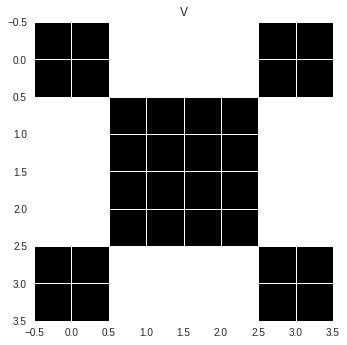

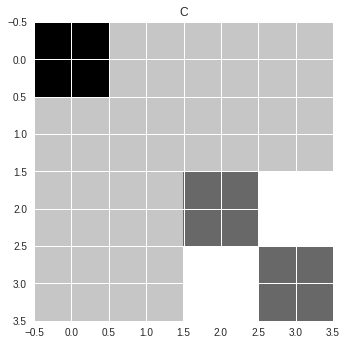

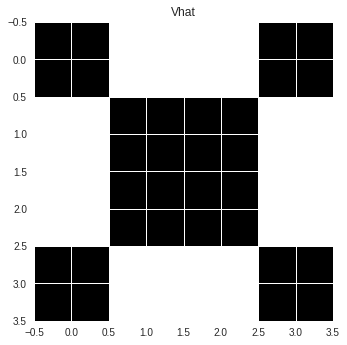

In [6]:
V = np.array([[1,0,0,1],
              [0,1,1,0],
              [0,1,1,0],
              [1,0,0,1]])

C = (inv(W).dot(V)).dot(W)
Vhat = (W.dot(C)).dot(inv(W))

print('V =',V)
print('C =',C)

plt.figure(1)
plt.imshow(V)
plt.title('V')

plt.figure(2)
plt.imshow(C)
plt.title('C')

plt.figure(3)
plt.imshow(Vhat)
plt.title('Vhat')

print()
print('0th norms of input signal and wavelet coefs')
print('|V|0 = ', np.count_nonzero(V))
print('|C|0 = ', np.count_nonzero(C))
print()

By Recursion - calculate the wavelet coefficients by recursion, instead of a matrix multiply

i: recursion level

a: averages

d: differences

cr: coefs calculated by recursion (should be the same as c)

Apply the 1-D transform column-wise first, then apply the 1-D transform to the rows of the result.  The 0,0 entry should contain the average of all entries.

In [12]:
M, N = V.shape
Cr = np.zeros_like(V, dtype=float)

print('By columns...')
i = 1
aprev = V
a = np.zeros_like(V, dtype=float)
for col in range(N):
  for j in range(0,N,2**i):
    a[j:j+2**i, col] = np.average(V[j:j+2**i, col])  
d = aprev - a
for col in range(N):
  Cr[2, col] = norm(d[:2**i, col], 1) / (N/2)
  Cr[3, col] = norm(d[2**i:, col], 1) / (N/2)
print('\trecursion level {}: a = {}, d = {}\n => cr={}'.format(i,a,d,Cr))
print()

i = 2
aprev = a
a = np.zeros_like(V, dtype=float)
for col in range(N):
  for j in range(0,N,2**i):
    a[j:j+2**i, col] = np.average(V[j:j+2**i, col])  
d = aprev - a
for col in range(N):
  Cr[0, col] = norm(a[:,col], 1) / N
  Cr[1, col] = norm(d[:, col], 1) / N
print('\trecursion level {}: a = {}, d = {}\n => cr={}'.format(i,a,d,Cr))
print()

print('By rows...')
i = 1
aprev = V
a = np.zeros_like(V, dtype=float)
for row in range(N):
  for j in range(0,N,2**i):
    a[row, j:j+2**i] = np.average(V[row, j:j+2**i])  
d = aprev - a
for row in range(N):
  Cr[row, 2] = norm(d[row, :2**i], 1) / (N/2)
  Cr[row, 3] = norm(d[row, 2**i:], 1) / (N/2)
print('\trecursion level {}: a = {}, d = {}\n => cr={}'.format(i,a,d,Cr))
print()

i = 2
aprev = a
a = np.zeros_like(V, dtype=float)
for row in range(N):
  for j in range(0,N,2**i):
    a[row, j:j+2**i] = np.average(V[row, j:j+2**i])  
d = aprev - a
for row in range(N):
  Cr[row, 0] = norm(a[row,:], 1) / N
  Cr[row, 1] = norm(d[row,:], 1) / N
print('\trecursion level {}: a = {}, d = {}\n => cr={}'.format(i,a,d,Cr))
print()


#M, N = v.shape
#cr = np.zeros_like(v, dtype=float)
#
#i = 1
#aprev = v
#a = np.zeros_like(v, dtype=float)
#a[:2,:2] = np.average(aprev.astype(float)[:2,:2])
#a[2:,:2] = np.average(aprev.astype(float)[2:,:2])
#a[2:,2:] = np.average(aprev.astype(float)[2:,2:])
#a[:2,2:] = np.average(aprev.astype(float)[:2,2:])
#d = aprev
## from the upper left quadrant
#cr[0,0] = a[0,0]
#cr[0,2] = d[0,1]
#cr[2,0] = d[1,0]
#cr[2,2] = d[1,1]
## from the upper right quadrant
#cr[0,1] = a[0,2]
#cr[0,3] = d[0,3]
#cr[2,1] = d[1,2]
#cr[2,3] = d[1,3]
## from the lower left quadrant
#cr[1,0] = a[2,0]
#cr[1,2] = d[2,1]
#cr[3,0] = d[3,0]
#cr[3,2] = d[3,1]
## from the lower right quadrant
#cr[1,1] = a[2,2]
#cr[1,3] = d[2,3]
#cr[3,1] = d[3,2]
#cr[3,3] = d[3,3]
#
#print('recursion level {}:\n a = {},\n d = {}\n =>\n cr={}\n'.format(i,a,d,cr))
#print()
#
#i = 2
#aprev = a
#a = np.zeros_like(v, dtype=float)
#a[:] = np.average(aprev.astype(float))  
#d = aprev
## upper left quadrant
#cr[0,0] = a[0,0]
#
#print('recursion level {}:\n a = {},\n d = {}\n =>\n cr={}'.format(i,a,d,cr))
#print()

print('C=',C)
print('Cr=',Cr)
print('|C-Cr|2 =', norm(C-Cr,2))
print('np.average(V)=',np.average(V))
print('np.average(V)==Cr[0,0]:',np.average(V)==Cr[0,0])

By columns...
	recursion level 1: a = [[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]], d = [[ 0.5 -0.5 -0.5  0.5]
 [-0.5  0.5  0.5 -0.5]
 [-0.5  0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]
 => cr=[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]

	recursion level 2: a = [[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]], d = [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
 => cr=[[0.5 0.5 0.5 0.5]
 [0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]

By rows...
	recursion level 1: a = [[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]], d = [[ 0.5 -0.5 -0.5  0.5]
 [-0.5  0.5  0.5 -0.5]
 [-0.5  0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]
 => cr=[[0.5 0.5 0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]

	recursion level 2: a = [[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]], d = [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0.


A bigger N

W orthonormal:  True
C= [[ 2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -1.  0.  0.  0.  0.]
 [ 0.  0. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  1. -1.  0.]
 [ 0.  0.  0.  0.  0. -1.  1.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  1.]]

0th norms of input signal and wavelet coefs
|V|0 =  16
|C|0 =  13


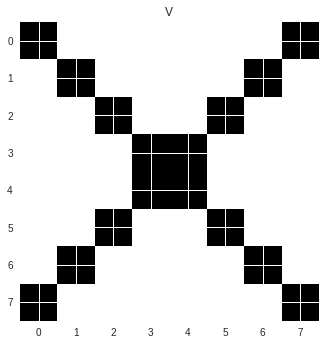

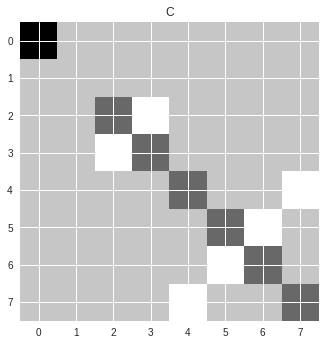

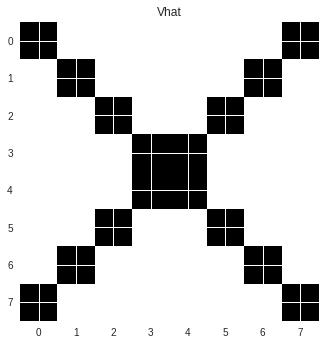

In [18]:
N = 8
V = np.eye(N)
for i in range(N):
  V[i,N-i-1] = 1
  
  
W = np.array([[1, 1, 1, 0, 1, 0, 0, 0],
              [1, 1, 1, 0,-1, 0, 0, 0],
              [1, 1,-1, 0, 0, 1, 0, 0],
              [1, 1,-1, 0, 0,-1, 0, 0],
              [1,-1, 0, 1, 0, 0, 1, 0],
              [1,-1, 0, 1, 0, 0,-1, 0],
              [1,-1, 0,-1, 0, 0, 0, 1],
              [1,-1, 0,-1, 0, 0, 0,-1]
             ])

M,N = W.shape
print('W orthonormal: ', (W.dot(inv(W))==np.eye(N)).all())
    
C = (inv(W).dot(V)).dot(W)
Vhat = (W.dot(C)).dot(inv(W))

print('C=', C)

plt.figure(1)
plt.imshow(V)
plt.title('V')

plt.figure(2)
plt.imshow(C)
plt.title('C')

plt.figure(3)
plt.imshow(Vhat)
plt.title('Vhat')

print()
print('0th norms of input signal and wavelet coefs')
print('|V|0 = ', np.count_nonzero(V))
print('|C|0 = ', np.count_nonzero(C))

Wavelet basis generating function:

W = wavelet_basis(N)

input N: generate the NxN wavelet basis matrix

output W: the NxN wavelet basis matrix

note: N should be an integer power of 2

In [0]:
from math import log10

def log2(x):
  return log10(N) / log10(2)

def wavelet_basis(N):
  Nlog2 = log2(N)
  assert int(Nlog2)==Nlog2, "N should be an integer power of 2"
  assert N>0, "N should be bigger than 0"
  Nlog2 = int(Nlog2)
  W = np.zeros((N,N), dtype=float)
  W[:,0] = 1.0
  for i in range(Nlog2):
    for j in range(2**i):
      col = j+2**i
      rows = int(N / (2**(i+1)))
      W[2*j*rows:(2*j+1)*rows,col] = 1.0
      W[(2*j+1)*rows:(2*j+2)*rows,col] = -1.0
  assert (W.dot(inv(W))==np.eye(N)).all(), "Generated W not orthonormal"
  return W


W orthonormal:  True
C= [[2. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

0th norms of input signal and wavelet coefs
|V|0 =  128
|C|0 =  125


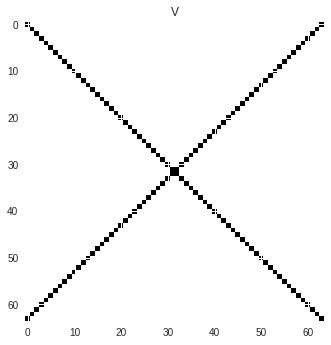

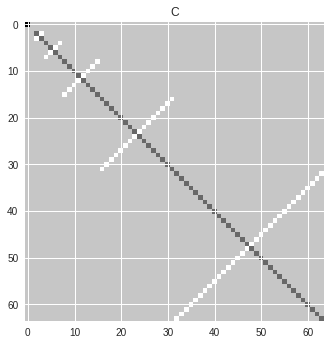

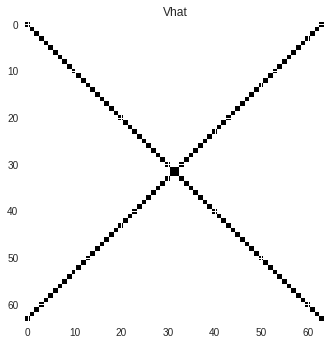

In [20]:
N = 64
V = np.eye(N)
for i in range(N):
  V[i,N-i-1] = 1
  
W = wavelet_basis(N)

M,N = W.shape
print('W orthonormal: ', (W.dot(inv(W))==np.eye(N)).all())
    
C = (inv(W).dot(V)).dot(W)
Vhat = (W.dot(C)).dot(inv(W))

print('C=', C)

plt.figure(1)
plt.imshow(V)
plt.title('V')

plt.figure(2)
plt.imshow(C)
plt.title('C')

plt.figure(3)
plt.imshow(Vhat)
plt.title('Vhat')

print()
print('0th norms of input signal and wavelet coefs')
print('|V|0 = ', np.count_nonzero(V))
print('|C|0 = ', np.count_nonzero(C))

Instead of greyscale, RGB

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(64, 64, 3)
W orthonormal:  True
C= [[[ 8160.  8160.  4080.]
  [    0.     0. -4080.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]]

 [[    0. -8160.  4080.]
  [ 8160.     0. -4080.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]]

 [[    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]]

 ...

 [[    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]]

 [[    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]]

 [[    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]
  ...
  [    0.     0.     0.]
  [    0.     0.     0.]
  [    0.     0.     0.]]]

0th norms

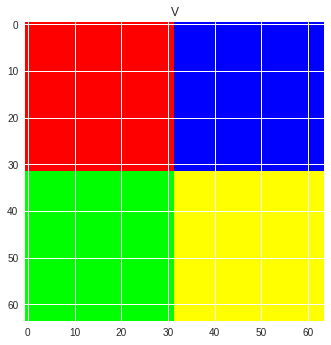

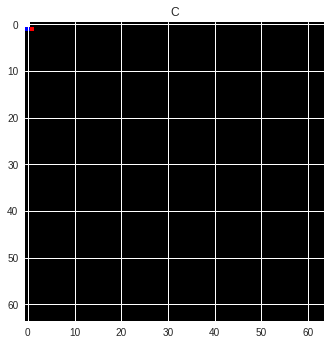

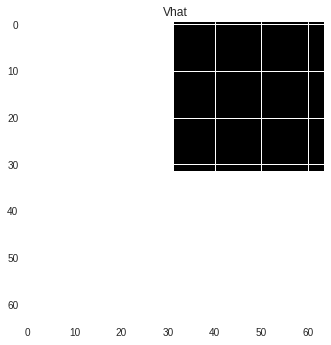

In [24]:
N = 64
V = np.zeros((N,N,3))

print(V.shape)
V[:32,:32,:] = np.array([255,0,0])
V[32:,:32,:] = np.array([0,255,0])
V[:32,32:,:] = np.array([0,0,255])
V[32:,32:,:] = np.array([255,255,0])

W = wavelet_basis(N)

M,N = W.shape
print('W orthonormal: ', (W.dot(inv(W))==np.eye(N)).all())
    
C = np.zeros_like(V)
# can use np.tensordot here with axis instead
for i in range(3):
  C[:,:,i] = (inv(W).dot(V[:,:,i])).dot(W)
  Vhat = (W.dot(C[:,:,i])).dot(inv(W))

print('C=', C)

plt.figure(1)
plt.imshow(V)
plt.title('V')

plt.figure(2)
plt.imshow(C)
plt.title('C')

plt.figure(3)
plt.imshow(Vhat)
plt.title('Vhat')

print()
print('0th norms of input signal and wavelet coefs')
print('|V|0 = ', np.count_nonzero(V))
print('|C|0 = ', np.count_nonzero(C))